### Pierre Koekemoer 
Advanced Regression Predict


# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**Pierre, Koekoemoer**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random 
import pickle

# Libraries for data preparation and model building
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import lightgbm as lgb


#Ensemble
from sklearn.ensemble import VotingRegressor #Hetero
from sklearn.ensemble import StackingRegressor #Hetero
from sklearn.ensemble import BaggingRegressor #Homo
from sklearn.ensemble import AdaBoostRegressor #Homo
from sklearn.ensemble import ExtraTreesRegressor #Homo
import xgboost as xgb


from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error



# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 42

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
df = pd.read_csv('df_train.csv')
df_test = pd.read_csv('df_test.csv')

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [3]:
df.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
time,2015-01-01 03:00:00,2015-01-01 06:00:00,2015-01-01 09:00:00,2015-01-01 12:00:00,2015-01-01 15:00:00
Madrid_wind_speed,0.666667,0.333333,1.0,1.0,1.0
Valencia_wind_deg,level_5,level_10,level_9,level_8,level_7
Bilbao_rain_1h,0.0,0.0,0.0,0.0,0.0
Valencia_wind_speed,0.666667,1.666667,1.0,1.0,1.0
Seville_humidity,74.333333,78.333333,71.333333,65.333333,59.0
Madrid_humidity,64.0,64.666667,64.333333,56.333333,57.0
Bilbao_clouds_all,0.0,0.0,0.0,0.0,2.0
Bilbao_wind_speed,1.0,1.0,1.0,1.0,0.333333


In [4]:
df.columns

Index(['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Sev

In [5]:
# look at data statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,8763.0,4381.000000,2529.804538,0.000000,2190.500000,4381.000000,6571.500000,8.762000e+03
Madrid_wind_speed,8763.0,2.425729,1.850371,0.000000,1.000000,2.000000,3.333333,1.300000e+01
Bilbao_rain_1h,8763.0,0.135753,0.374901,0.000000,0.000000,0.000000,0.100000,3.000000e+00
Valencia_wind_speed,8763.0,2.586272,2.411190,0.000000,1.000000,1.666667,3.666667,5.200000e+01
Seville_humidity,8763.0,62.658793,22.621226,8.333333,44.333333,65.666667,82.000000,1.000000e+02
Madrid_humidity,8763.0,57.414717,24.335396,6.333333,36.333333,58.000000,78.666667,1.000000e+02
Bilbao_clouds_all,8763.0,43.469132,32.551044,0.000000,10.000000,45.000000,75.000000,1.000000e+02
Bilbao_wind_speed,8763.0,1.850356,1.695888,0.000000,0.666667,1.000000,2.666667,1.266667e+01
Seville_clouds_all,8763.0,13.714748,24.272482,0.000000,0.000000,0.000000,20.000000,9.733333e+01
Bilbao_wind_deg,8763.0,158.957511,102.056299,0.000000,73.333333,147.000000,234.000000,3.593333e+02


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

In [7]:
df.isnull().sum()


Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

In [8]:
vp = df[df['Valencia_pressure'].isnull() == True]
vp = pd.DataFrame(vp['Valencia_pressure'])
vp_median = df['Valencia_pressure'].fillna(df['Valencia_pressure'].median())
vp.isnull().sum()

Valencia_pressure    2068
dtype: int64

In [9]:
#shape
print(df.shape)

#skew
print(df.skew().sort_values())
#kurtosis
print(df.kurtosis().sort_values())

(8763, 49)
Seville_weather_id      -3.275574
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Madrid_pressure         -1.850768
Valencia_pressure       -1.705162
Bilbao_weather_id       -1.234844
Bilbao_pressure         -0.999642
load_shortfall_3h       -0.384847
Seville_humidity        -0.310175
Valencia_humidity       -0.305757
Barcelona_wind_deg      -0.180001
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Seville_temp_max        -0.033931
Barcelona_temp_min      -0.018057
Unnamed: 0               0.000000
Valencia_temp            0.057476
Valencia_temp_min        0.081832
Valencia_temp_max        0.082672
Barcelona_temp           0.128095
Seville_temp             0.157238
Bilbao_temp_min          0.194912
Bilbao_wind_deg          0.226927
Seville_temp_min         0.265482
Madrid_temp_min          0.275083
Barcelona_temp_max       0.276925
Bilbao_temp              0.293686
Madrid_temp_max          0.298707
Madrid_temp              0.304123
Bil

C:\Users\PierreK\AppData\Local\Temp\ipykernel_21824\2435507414.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.skew().sort_values())
C:\Users\PierreK\AppData\Local\Temp\ipykernel_21824\2435507414.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.kurtosis().sort_values())


In [10]:
# plot relevant feature interactions
# sns.pairplot(df) #sns pairplot was used in this instance,it was commented out due to computation time to excecute

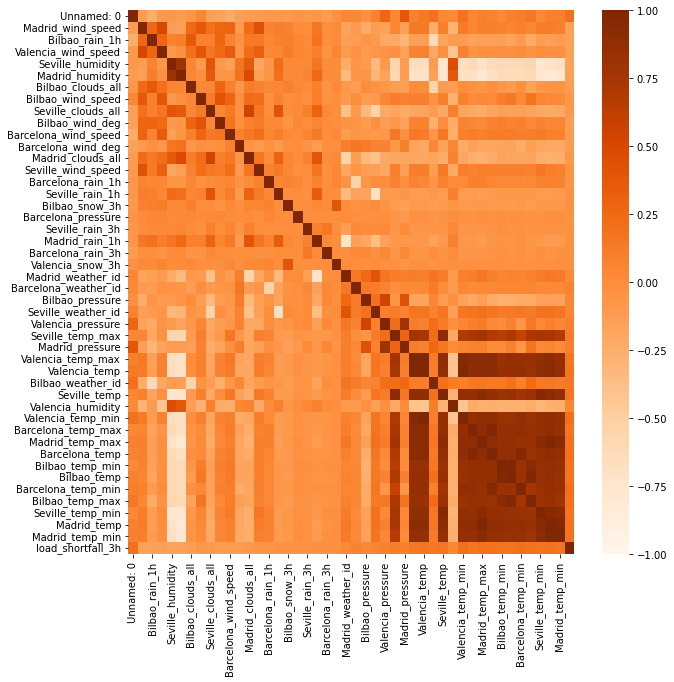

In [11]:
# evaluate correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),vmin=-1,vmax=1, cmap= 'Oranges')
plt.show()


In [12]:
df.corr()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Unnamed: 0,1.000000,-0.109288,-0.249633,-0.090161,-0.079025,-0.103359,-0.068123,0.049197,-0.140583,-0.155738,...,0.093378,0.068078,0.028698,0.081799,0.103436,0.146216,0.037487,0.088439,0.085197,0.192612
Madrid_wind_speed,-0.109288,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,...,0.091464,0.080133,0.077330,0.060467,0.089992,0.042114,0.110278,0.109572,0.098138,-0.150981
Bilbao_rain_1h,-0.249633,0.259719,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,...,-0.148397,-0.138901,-0.141269,-0.182494,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.152510
Valencia_wind_speed,-0.090161,0.513092,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,...,-0.021970,-0.021456,-0.010166,-0.022676,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.142791
Seville_humidity,-0.079025,-0.117892,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,...,-0.708937,-0.617797,-0.605493,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.167290
Madrid_humidity,-0.103359,-0.137092,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,...,-0.803260,-0.684867,-0.635760,-0.634825,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.150536
Bilbao_clouds_all,-0.068123,0.244001,0.370733,0.210524,0.061680,0.041878,1.000000,0.031915,0.046737,0.280154,...,-0.048491,-0.023171,-0.067731,-0.114118,-0.010804,-0.158014,-0.077417,-0.046686,-0.046189,-0.127293
Bilbao_wind_speed,0.049197,0.377854,0.085398,0.386478,-0.088180,-0.016808,0.031915,1.000000,0.127344,0.417534,...,0.025367,0.018967,0.107302,0.142435,0.023711,0.177123,0.055077,0.031245,0.021425,-0.081602
Seville_clouds_all,-0.140583,0.191251,0.081131,0.163675,0.399436,0.374112,0.046737,0.127344,1.000000,0.053482,...,-0.238895,-0.186463,-0.134249,-0.152393,-0.153412,-0.165567,-0.200453,-0.227094,-0.212758,-0.091804
Bilbao_wind_deg,-0.155738,0.270950,0.279350,0.248643,-0.087246,-0.069570,0.280154,0.417534,0.053482,1.000000,...,0.028535,0.068701,0.095047,0.065396,0.086482,0.031187,0.062663,0.044102,0.048397,-0.120800


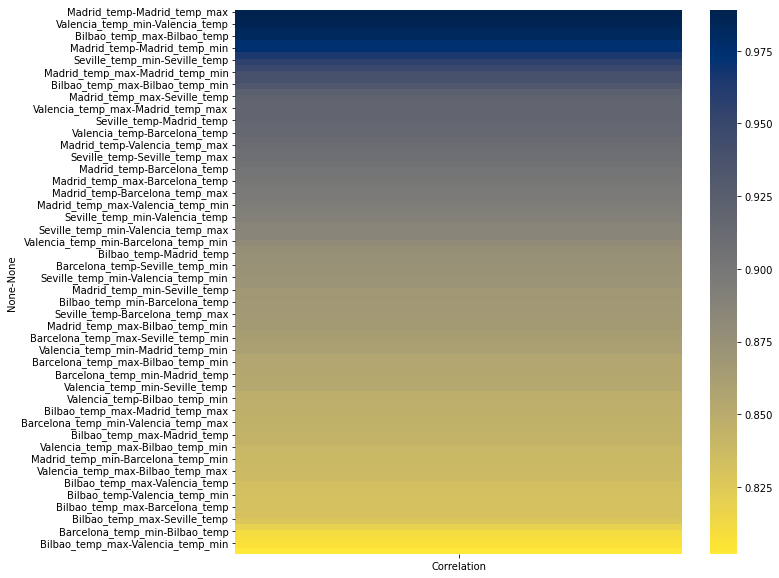

In [13]:
corr = df.corr().unstack().sort_values(ascending = False)
corr_filt = corr[(corr.notnull() == True) & (corr >= 0.8) & (corr < 1) ]
corr_filt = pd.DataFrame(corr_filt,columns = ['Correlation'])
plt.figure(figsize=(10,10))
sns.heatmap(corr_filt, cmap = 'cividis_r')
plt.show()

In [14]:
# have a look at feature distributions
df.kurtosis().sort_values()

C:\Users\PierreK\AppData\Local\Temp\ipykernel_21824\397106845.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurtosis().sort_values()


Bilbao_clouds_all         -1.533417
Unnamed: 0                -1.200000
Madrid_humidity           -1.167537
Bilbao_wind_deg           -1.083530
Seville_humidity          -1.017983
Barcelona_wind_deg        -0.959160
Valencia_humidity         -0.734345
Barcelona_temp_max        -0.728757
Barcelona_temp            -0.696555
Madrid_temp_min           -0.666646
Madrid_temp_max           -0.662861
Valencia_temp             -0.643793
Valencia_temp_max         -0.613755
Madrid_temp               -0.612299
Valencia_temp_min         -0.599551
Seville_temp_max          -0.515989
Seville_temp              -0.504132
Seville_temp_min          -0.475564
Barcelona_temp_min        -0.474890
Bilbao_temp_min           -0.230342
load_shortfall_3h         -0.118999
Bilbao_temp               -0.086363
Bilbao_weather_id          0.067814
Madrid_clouds_all          0.142079
Bilbao_temp_max            0.283366
Seville_wind_speed         1.398580
Barcelona_wind_speed       1.493635
Bilbao_pressure            1

C:\Users\PierreK\AppData\Local\Temp\ipykernel_21824\3359370284.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  k = df.kurtosis().sort_values()


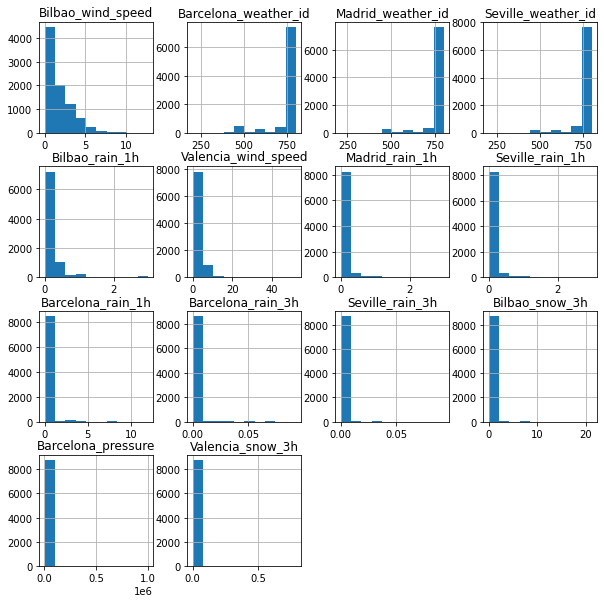

In [15]:
#leptokurtic
k = df.kurtosis().sort_values()
lepto = pd.DataFrame(k, columns = ['Values'], )
lepto = lepto[lepto['Values']> 3]

lepto_list = list(lepto.index)
df[lepto_list].hist(figsize=(10,10));

C:\Users\PierreK\AppData\Local\Temp\ipykernel_21824\3464753589.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  k = df.kurtosis().sort_values()


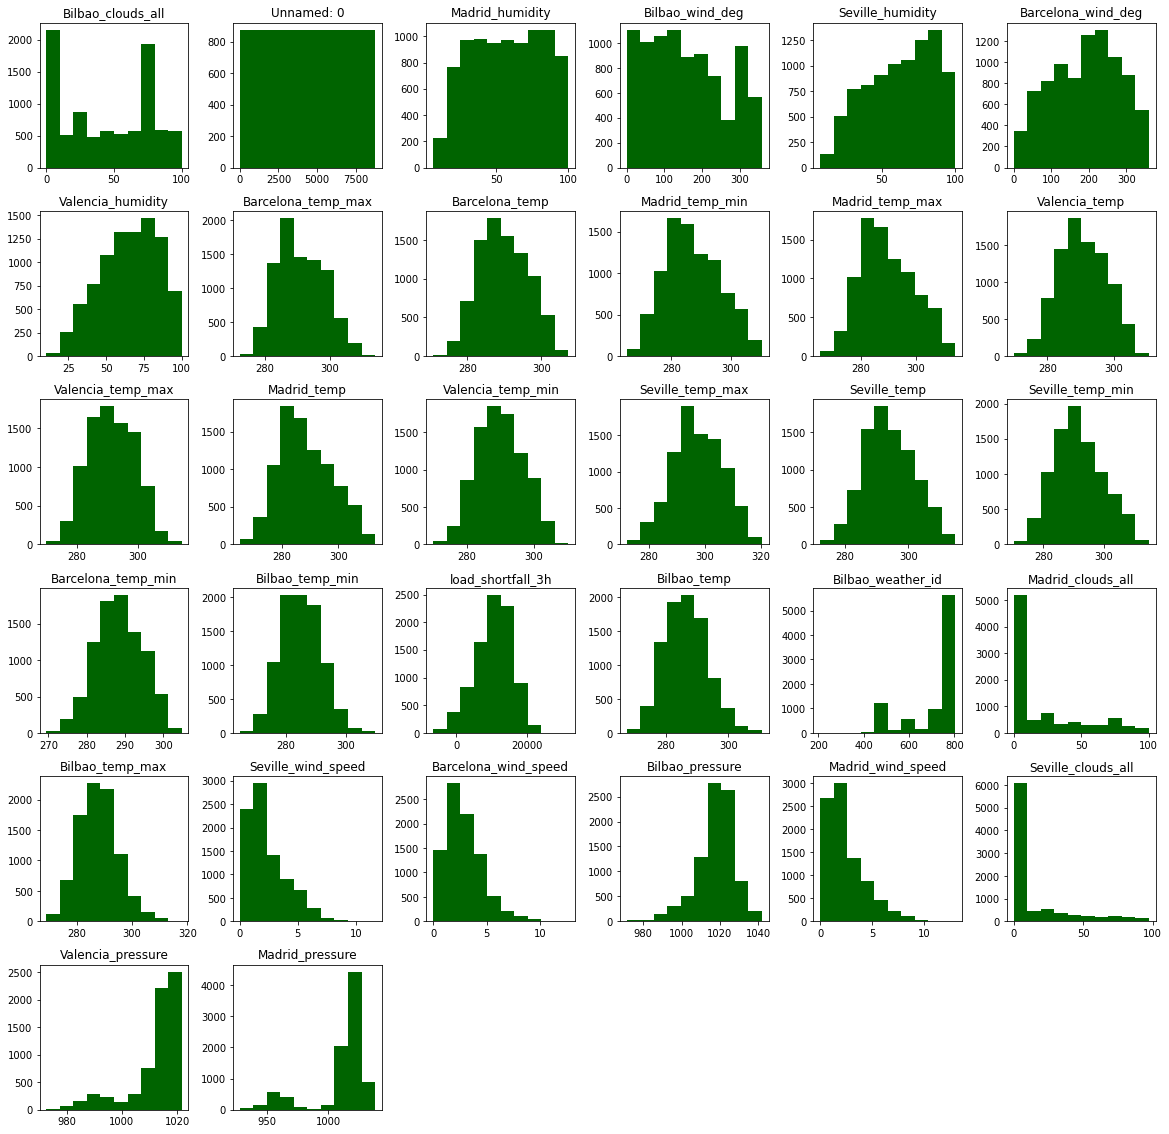

In [16]:
#Platykurtic
k = df.kurtosis().sort_values()
lepto = pd.DataFrame(k, columns = ['Values'], )
lepto = lepto[round(lepto['Values']) < 3]

lepto_list = list(lepto.index)
df[lepto_list].hist(figsize=(20,20),grid= False,color= 'darkgreen' );


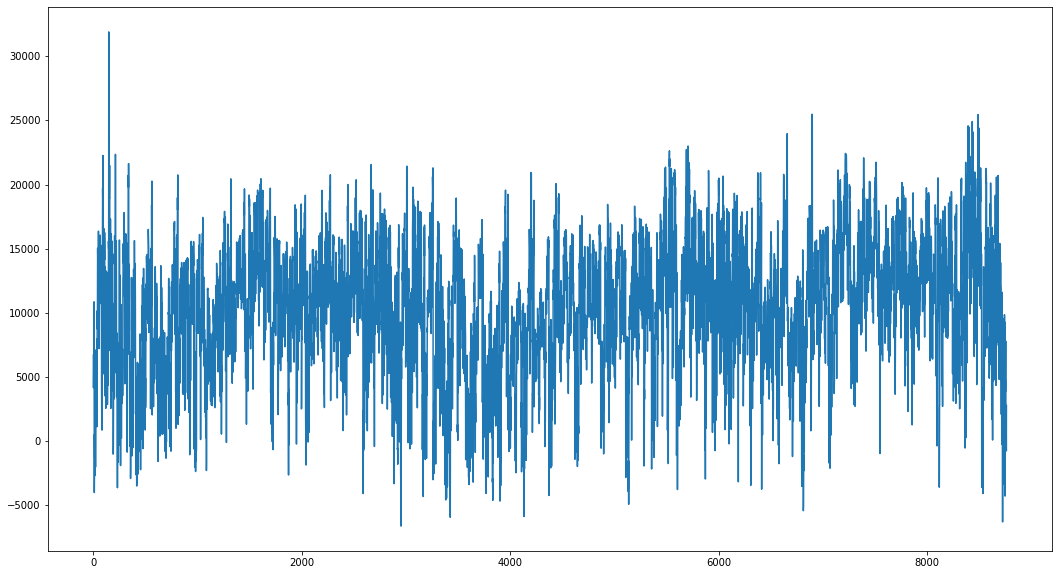

In [17]:
plt.figure(figsize=(18,10))
plt.plot(df['load_shortfall_3h'])

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [18]:
df_comb = pd.concat([df,df_test]) 
df_comb.shape

(11683, 49)

In [19]:
# remove missing values/ features

df_comb ['Valencia_pressure'] = df_comb['Valencia_pressure'].fillna(df['Valencia_pressure'].mode()[0])
df_comb.columns = [col.replace(" ","_") for col in df_comb.columns] 
df_comb = df_comb.drop(['Unnamed:_0'],axis =1)



#df_test 

df_test['Valencia_pressure'] = df_test['Valencia_pressure'].fillna(df_test['Valencia_pressure'].mode()[0])
df_test.columns = [col.replace(" ","_") for col in df_test.columns]
df_test = df_test.drop(['Unnamed:_0'],axis =1)


df_comb.head().T

,0,1,2,3,4
time,2015-01-01 03:00:00,2015-01-01 06:00:00,2015-01-01 09:00:00,2015-01-01 12:00:00,2015-01-01 15:00:00
Madrid_wind_speed,0.666667,0.333333,1.0,1.0,1.0
Valencia_wind_deg,level_5,level_10,level_9,level_8,level_7
Bilbao_rain_1h,0.0,0.0,0.0,0.0,0.0
Valencia_wind_speed,0.666667,1.666667,1.0,1.0,1.0
Seville_humidity,74.333333,78.333333,71.333333,65.333333,59.0
Madrid_humidity,64.0,64.666667,64.333333,56.333333,57.0
Bilbao_clouds_all,0.0,0.0,0.0,0.0,2.0
Bilbao_wind_speed,1.0,1.0,1.0,1.0,0.333333
Seville_clouds_all,0.0,0.0,0.0,0.0,0.0


In [20]:
# create new features

pressures = []
for T in df_comb['Seville_temp']:
    p_h = 101325 * np.exp((-5.6e-26 * 9.8* 680)/(1.380649e-23 * float(T))) *0.01 # where T is a temperature of a particular day
    pressures.append(p_h+100)
df_comb['Seville_pressure'] = pressures




In [21]:
#create new feature for df_test

pressures_t = []
for T in df_test['Seville_temp']:
    p_h = 101325 * np.exp((-5.6e-26 * 9.8* 680)/(1.380649e-23 * float(T))) *0.01 # where T is a temperature of a particular day
    pressures_t.append(p_h+100)
df_test['Seville_pressure'] = pressures_t

In [22]:
pd.DataFrame(df_comb['Seville_pressure']).describe()

,Seville_pressure
count,11683.000000
mean,1023.947858
std,2.316074
min,1017.422146
25%,1022.300013
50%,1023.803950
75%,1025.616268
max,1029.924716


In [23]:
df_comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11683 entries, 0 to 2919
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  11683 non-null  object 
 1   Madrid_wind_speed     11683 non-null  float64
 2   Valencia_wind_deg     11683 non-null  object 
 3   Bilbao_rain_1h        11683 non-null  float64
 4   Valencia_wind_speed   11683 non-null  float64
 5   Seville_humidity      11683 non-null  float64
 6   Madrid_humidity       11683 non-null  float64
 7   Bilbao_clouds_all     11683 non-null  float64
 8   Bilbao_wind_speed     11683 non-null  float64
 9   Seville_clouds_all    11683 non-null  float64
 10  Bilbao_wind_deg       11683 non-null  float64
 11  Barcelona_wind_speed  11683 non-null  float64
 12  Barcelona_wind_deg    11683 non-null  float64
 13  Madrid_clouds_all     11683 non-null  float64
 14  Seville_wind_speed    11683 non-null  float64
 15  Barcelona_rain_1h   

In [24]:
# engineer existing features

df_comb['Valencia_wind_deg'] = df_comb['Valencia_wind_deg'].str.extract('(\d+)')
df_comb['Valencia_wind_deg'] = pd.to_numeric(df_comb['Valencia_wind_deg'])
df_test['Valencia_wind_deg'] = df_test['Valencia_wind_deg'].str.extract('(\d+)')
df_test['Valencia_wind_deg'] = pd.to_numeric(df_test['Valencia_wind_deg'])

In [25]:
df_comb.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [26]:
df_comb['time'] = pd.to_datetime(df_comb['time'])

In [27]:
#time features 



# day
df_comb['Day'] = df_comb['time'].dt.day
# month
df_comb['Month'] = df_comb['time'].dt.month
# year
df_comb['Year'] = df_comb['time'].dt.year
# hour
df_comb['hour'] = df_comb['time'].dt.hour
# minute
df_comb['minute'] = df_comb['time'].dt.minute
# second
df_comb['second'] = df_comb['time'].dt.second
# Monday is 0 and Sunday is 6
df_comb['weekday'] = df_comb['time'].dt.weekday
# week of the year
df_comb['week_of_year'] = df_comb['time'].dt.week

C:\Users\PierreK\AppData\Local\Temp\ipykernel_21824\1364594118.py:20: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_comb['week_of_year'] = df_comb['time'].dt.week


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

<a href=#mod>5.1 Modelling</a>

<a href=#test>5.2 Testing and Kaggle Submission</a>

<a href=#load>5.3 Load Model</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

<a id="mod"></a>

### 5.1: Modelling 

In [28]:
# split data
df_comb = df_comb.drop(['time'],axis=1)
X = df_comb[:len(df)].drop(['load_shortfall_3h'],axis =1)
y = df_comb[:len(df)][['load_shortfall_3h']]


In [29]:
X.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp,Madrid_temp_min,Day,Month,Year,hour,minute,second,weekday,week_of_year
0,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,...,265.938000,265.938000,1,1,2015,3,0,0,3,1
1,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,...,266.386667,266.386667,1,1,2015,6,0,0,3,1
2,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,...,272.708667,272.708667,1,1,2015,9,0,0,3,1
3,1.000000,8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,...,281.895219,281.895219,1,1,2015,12,0,0,3,1
4,1.000000,7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,...,280.678437,280.678437,1,1,2015,15,0,0,3,1


In [30]:
# create targets and features dataset



# standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.2,random_state = 42 )

y_train = np.ravel(y_train)

trained_x = df_comb[:len(df)].drop(['load_shortfall_3h'],axis =1)
tested_x = df_comb[len(df):].drop(['load_shortfall_3h'],axis =1)


#xgboost
data_dmatrix = xgb.DMatrix(data=X,label=y)


In [31]:
y.head()

,load_shortfall_3h
0,6715.666667
1,4171.666667
2,4274.666667
3,5075.666667
4,6620.666667


In [32]:
# evaluate one or more ML models

#This is a rmse function to measure the performance of various models during the creation stage of the model to save time
def rmse (y_tests,y_predict):
    return np.sqrt(mean_squared_error(y_tests,y_predict))


In [33]:
# create one or more ML models


#Xgboost model

xgb_reg = xgb.XGBRegressor()

xgb_model = xgb_reg.fit(x_train,y_train)

xgb_pred = xgb_model.predict(x_test)

rmse(y_test,xgb_pred)

2652.8093289334333

In [34]:
#Random_Forest
RF = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
RF.fit = RF.fit(x_train,y_train)

RF_Pred = RF.predict(x_test)

rmse(y_test,RF_Pred)

2746.8147965554485

In [35]:
#bagging_decision_tree

# Instantiate decision tree regression model to use as the base model
d_tree = DecisionTreeRegressor(max_depth=7)
# Instantiate BaggingRegressor model with a decision tree as the base model
bag_reg = BaggingRegressor(base_estimator = d_tree)


bag_reg.fit(x_train,y_train)
bag_pred = bag_reg.predict(x_test)
rmse(y_test,bag_pred)

3497.8845545694053

In [36]:
# Boosting model
d_tree = DecisionTreeRegressor(max_depth=7)
# Instantiate AdaBoostRegressor model with a decision tree as the base model
bst_reg = AdaBoostRegressor(base_estimator = d_tree)

bst_reg.fit(x_train,y_train) 
bst_pred = bst_reg.predict(x_test)
rmse(y_test,bst_pred)

3125.0103829265563

In [37]:
# ExtraTreesRegressor
xt_reg = ExtraTreesRegressor(n_estimators=100, random_state=42)
xt_reg.fit(x_train, y_train)
xt_pred = xt_reg.predict(x_test)
rmse(y_test,xt_pred)

2654.943289071314

In [38]:
# lightgbm regressor

lgb_reg = lgb.LGBMRegressor()
lgb_reg.fit(x_train,y_train)
lgb_pred = lgb_reg.predict(x_test)
rmse(y_test,lgb_pred)

2680.4367896562044

In [39]:
#Loop to find best model for lightgbm regressor
max_r = 100

lowest_rmse = 10000
best_regressor = None

for r in range(max_r):
    lgb_reg = lgb.LGBMRegressor()
    lgb_reg.fit(x_train,y_train)
    lgb_pred = lgb_reg.predict(x_test)
    xrmse = rmse(y_test,lgb_pred)
    
    if xrmse < lowest_rmse:
        best_regressor = lgb_reg
        lowest_rmse = xrmse
    

best_regressor






LGBMRegressor()

In [40]:
best_pred = best_regressor.predict(x_test)
rmse(y_test,best_pred)

2680.4367896562044

In [41]:
# save the model to disk
filename = 'best_reg_model.sav'
pickle.dump(best_regressor, open(filename, 'wb'))

<a id="test"></a>
### 5.2 Testing and Kaggle submission

In [42]:
#My Kaggle submission file

# Light gradient booster kaggle
best_regressor.fit(trained_x, y)
lgb_best = best_regressor.predict(tested_x)




In [43]:
daf = pd.DataFrame(lgb_best, columns =['load_shortfall_3h'])
daf.head()

,load_shortfall_3h
0,12152.462424
1,8531.578139
2,5955.392184
3,8534.567399
4,13537.339270


In [44]:
output = pd.DataFrame({'time': df_test['time']})
submission = output.join(daf)
submission.to_csv('submission_xt.csv',index = False)
submission.head()

,time,load_shortfall_3h
0,2018-01-01 00:00:00,12152.462424
1,2018-01-01 03:00:00,8531.578139
2,2018-01-01 06:00:00,5955.392184
3,2018-01-01 09:00:00,8534.567399
4,2018-01-01 12:00:00,13537.339270


<a id="load"></a>
### 5.3 : Load model from file


In [45]:
# load the pickled model from file
loaded_model = pickle.load(open('best_reg_model.sav', 'rb'))
result = loaded_model.score(trained_x, y)
print(result)

0.839934084865047


<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [46]:
# Compare model performance

print("XGBoost Regressor :",rmse(y_test,xgb_pred))
print("Extra Tree Regressor :",rmse(y_test,xt_pred))
print("Light Gradient Boosting Machine :",rmse(y_test,lgb_pred))
print("RandomForest :",rmse(y_test,RF_Pred))
print("Bagging Regressor :",rmse(y_test,bag_pred))
print("AdaBoost Regressor :",rmse(y_test,bst_pred))



XGBoost Regressor : 2652.8093289334333
Extra Tree Regressor : 2654.943289071314
Light Gradient Boosting Machine : 2680.4367896562044
RandomForest : 2746.8147965554485
Bagging Regressor : 3497.8845545694053
AdaBoost Regressor : 3125.0103829265563


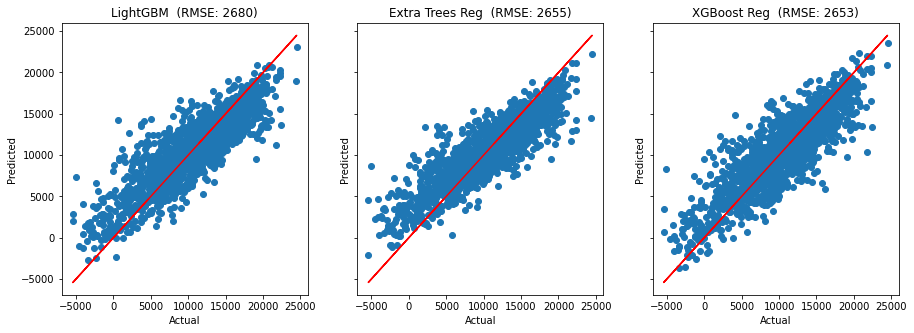

In [47]:
# Create figure and axes with subplot
f, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=3,sharey=True)

# List of titles for models used
pred = [lgb_pred, xt_pred, xgb_pred]
title = ['LightGBM', 'Extra Trees Reg', 'XGBoost Reg']

# Loop through all axes to plot each model's results 
for i in range(3):
    rmse = round(np.sqrt(mean_squared_error(pred[i],y_test)))
    ax[i].set_title(title[i]+"  (RMSE: "+str(rmse)+ ")")
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].plot(y_test,y_test,'r')
    ax[i].scatter(y_test,pred[i])

plt.show()

# Choose best model and motivate why it is the best choice:

My Model of choice will be the Light Gradient Boosting Machine algorithm, 
 
this choice is purely based on testing various models and comparing their corresponding Root Mean Squared Error (RMSE) scores
and how well they performed on the unseen test data.
These models include the following models, XGboost regressor,Extra Trees regressor,Random Forest Regressor,
Bagging Regressor using a decision tree, boosting regressor using a decision tree
and finally my model of choice the Light Gradient Boosting Machine Regressor model.

After training, fitting and testing, the top 4 models models were then used to create a submission file
to submit to kaggle and test which performed best on the unseen kaggle data, the RMSE comparison metric was 
again used as the deciding factor.
Resultantly the Light Gradient Boosting Machine Regressor model performed the best and was thus considered to be my
final model.

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

# Discuss chosen methods logic

The Light Gradient Boosting Machine (LightGBM) is a model that uses a tree like structure
and the ensemble coding method as a framework.

The LightGBM so effective is that it uses histogram-based instructions, this means it creates buckets for all the 
predictor variables/values and places them in bins similar to what you do when creating a histogram. This helps to reduce the 
strain on the computer to learn the data more effectively and effieciently.

Another feature that makes the LightGBM so effecitive compared to its counterparts,is
that that most decision tree learning algorithms only grow trees by depth,where the LightGBM grows the tree leaf wise
ensuring the best result is obtained for the predictor and response variable before continuing with the growth of the tree.
In essence the LightGBM model chooses a leaf with the maximum delta loss to grow,meaning the model has
lower loss compared to the level-wise algorithm.

The reason why this approach was so effective in this problem, was because the model optimizes on variables with
larger influence on the target value and randomly drops variables with small influence on the response variable 
to retain the accuracy of the variables with a larger influence. 
With all the variables in the data set models can easily be scewed and converge to a local
optimum by variables with little influence to the actual values being predicted.





